In [2]:
import pandas as pd

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

1.Boxplot for Median Value of Owner-Occupied Homes (MEDV):

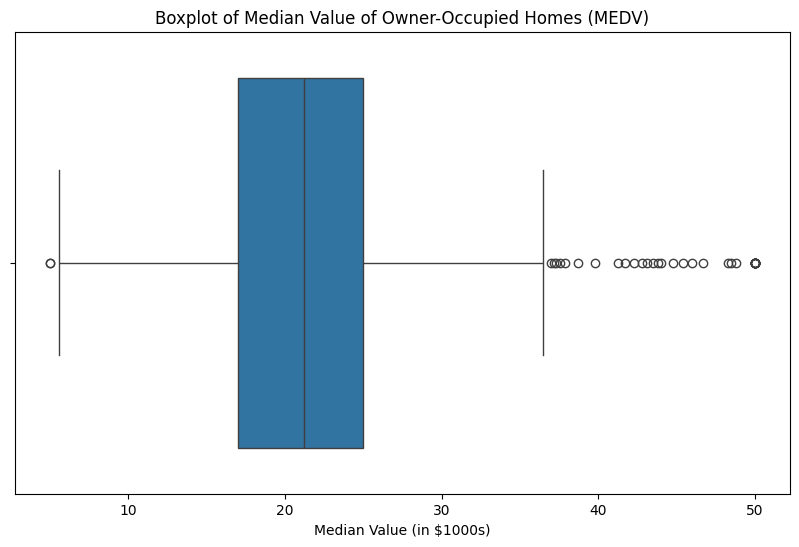

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')


plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')
plt.show()


2.Bar Plot for the Charles River Variable (CHAS):

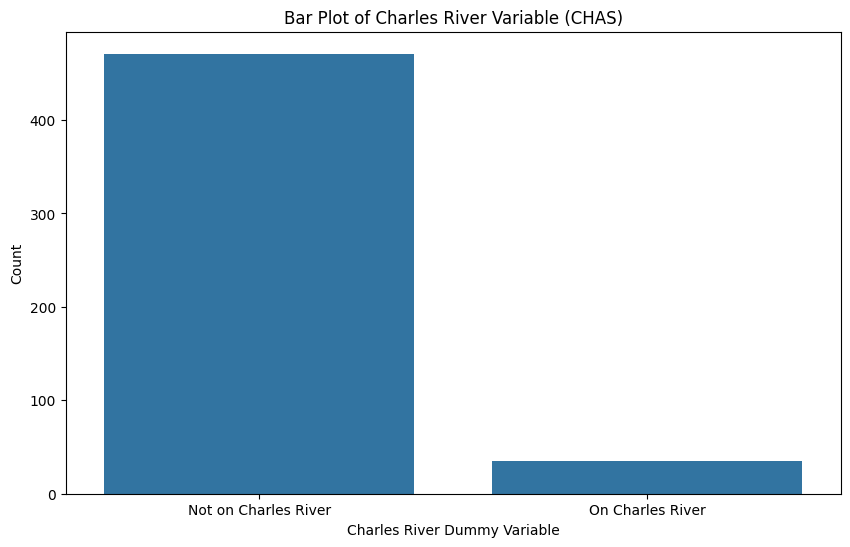

In [6]:

plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not on Charles River', 'On Charles River'])
plt.show()


3.Boxplot for MEDV vs. AGE (Discretized AGE Variable):

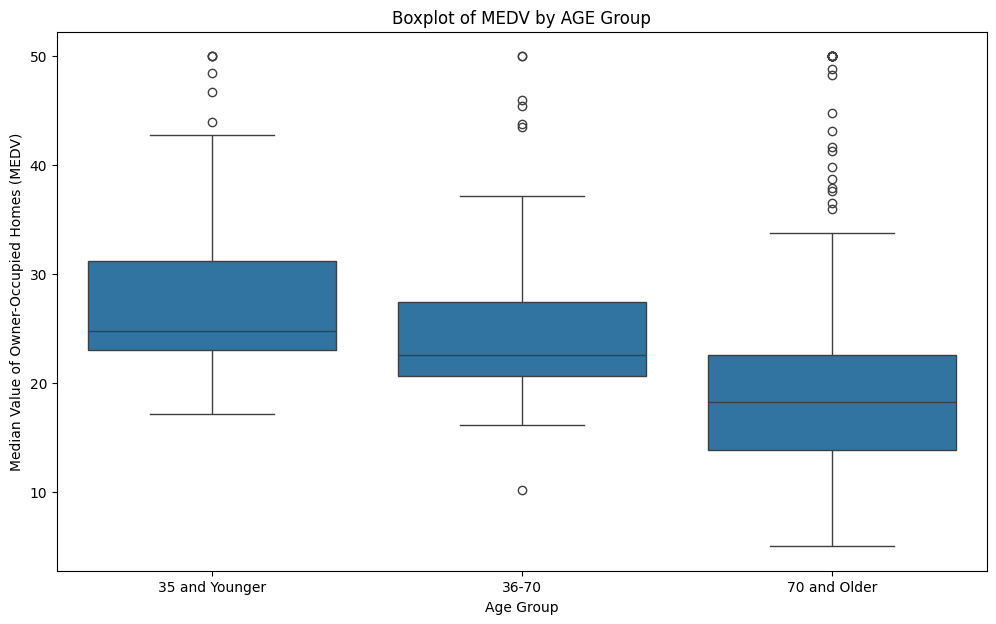

In [7]:

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '36-70', '70 and Older'])

plt.figure(figsize=(12, 7))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()


4.Scatter Plot for Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres (NOX vs. INDUS):

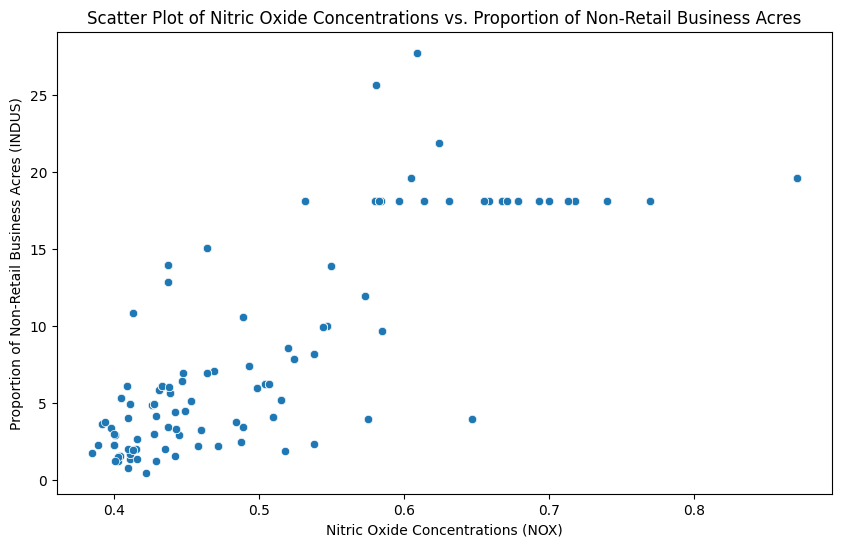

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


5.Histogram for Pupil-Teacher Ratio (PTRATIO):



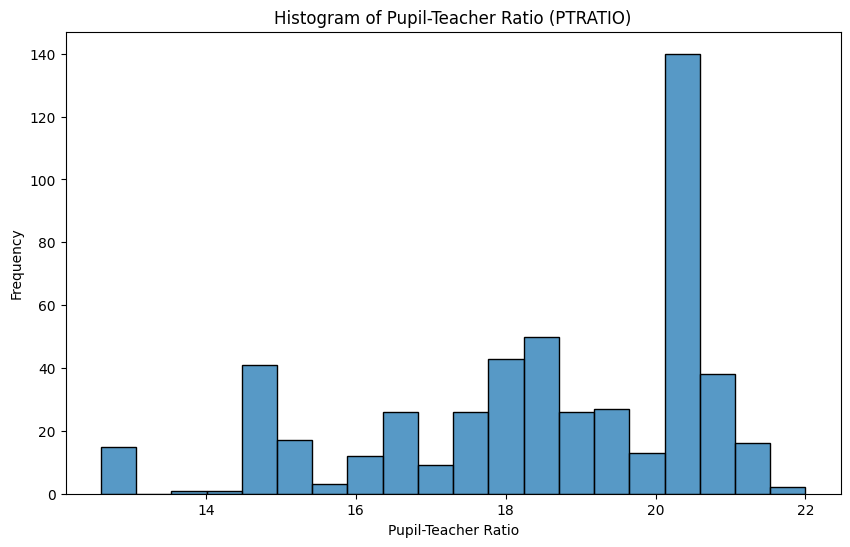

In [9]:

plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


1. Significant Difference in Median Value of Houses Bounded by the Charles River
Hypothesis:

Null Hypothesis (H₀): There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded by it.
Alternative Hypothesis (H₁): There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by it.
Significance Level: α = 0.05



In [10]:
from scipy import stats

chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


Conclusion:

If
𝑝
≤
𝛼
p≤α, reject the null hypothesis and conclude that there is a significant difference in median house values based on proximity to the Charles River.
If
𝑝
>
𝛼
p>α, fail to reject the null hypothesis and conclude that there is no significant difference.

2. Difference in Median Values of Houses (MEDV) by Proportion of Owner-Occupied Units Built Prior to 1940 (AGE)
Hypothesis:

Null Hypothesis (H₀): There is no difference in median values of houses for each age group.
Alternative Hypothesis (H₁): There is a difference in median values of houses for each age group.
Significance Level: α = 0.05

In [11]:

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '36-70', '70 and Older'])

anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_Group'] == '35 and Younger']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '36-70']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '70 and Older']['MEDV']
)

print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


Conclusion:

If
𝑝
≤
𝛼
p≤α, reject the null hypothesis and conclude that there is a significant difference in median house values among the different age groups.
If
𝑝
>
𝛼
p>α, fail to reject the null hypothesis and conclude that there is no significant difference.

3. Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres
Hypothesis:

Null Hypothesis (H₀): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres.
Alternative Hypothesis (H₁): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres.
Significance Level: α = 0.05

In [12]:

corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98


Conclusion:

If
𝑝
≤
𝛼
p≤α, reject the null hypothesis and conclude that there is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres.
If
𝑝
>
𝛼
p>α, fail to reject the null hypothesis and conclude that there is no significant relationship.


4. Impact of Additional Weighted Distance to the Five Boston Employment Centres on Median Value of Owner-Occupied Homes
Hypothesis:

Null Hypothesis (H₀): There is no impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
Alternative Hypothesis (H₁): There is an impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
Significance Level: α = 0.05



In [13]:
import statsmodels.api as sm

X = boston_df[['DIS']]
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        10:46:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion:

If the p-value for the DIS coefficient is
≤
𝛼
≤α, reject the null hypothesis and conclude that the weighted distance to the employment centers has a significant impact on the median home value.
If the p-value for the DIS coefficient is
>
𝛼
>α, fail to reject the null hypothesis and conclude that there is no significant impact.
Summary of Findings
For each test, check the calculated p-values against the significance level (α = 0.05) to determine whether to reject or fail to reject the null hypothesis. Each conclusion will provide insight into the relationships and differences within the dataset.






